In [1]:
import json
import os
from train import Trainer
import warnings
# Suppress all warnings
warnings.filterwarnings('ignore')

import torch
torch.cuda.is_available()

/home/zuzanna/miniconda3/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


['/home/zuzanna/miniconda3/lib/python312.zip', '/home/zuzanna/miniconda3/lib/python3.12', '/home/zuzanna/miniconda3/lib/python3.12/lib-dynload', '', '/home/zuzanna/miniconda3/lib/python3.12/site-packages', '/home']


/home/zuzanna/miniconda3/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/home/zuzanna/miniconda3/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
/home/zuzanna/miniconda3/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.
  warnings.warn(msg, FutureWarning)
/home/zuzanna/miniconda3/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing CSCDataset from `anndata.experimental` is deprecated. Import anndata.abc.CSCDataset instead.
  warnings.warn(msg, FutureWarning)
/home/zuzanna/miniconda3/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing CSRDataset from `anndata.expe

True

In [2]:
# Initialize the Trainer
my_trainer = Trainer(config_path="./config_alldatasets.json")

# Load all datasets
datasets = my_trainer.load_datasets()



Loaded configuration successfully.
Datasets Detected: ['dataset_Pbmc10k', 'dataset_TEA']
Loaded configuration successfully.
Loaded configuration successfully.
Added `interval` annotation for features from /home/zuzanna/data/GSM4949911_X061-AP0C1W1_leukopak_perm-cells_tea_fulldepth_cellrangerarc_filtered_feature_bc_matrix.h5
Loaded configuration successfully.
Added `interval` annotation for features from /home/zuzanna/data/GSM4949911_X061-AP0C1W1_leukopak_perm-cells_tea_fulldepth_cellrangerarc_filtered_feature_bc_matrix.h5
Loaded configuration successfully.
Loaded configuration successfully.


In [3]:
datasets

{'dataset_Pbmc10k': {'modalities': ['rna', 'atac'],
  'data': [AnnData object with n_obs × n_vars = 9578 × 2000
       obs: 'domain', 'cell_type', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
       var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
       uns: 'log1p', 'hvg'
       layers: 'counts',
   AnnData object with n_obs × n_vars = 9538 × 15000
       obs: 'domain', 'cell_type', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts'
       var: 'feature_types', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'lo


=== Processing dataset: dataset_Pbmc10k ===
Initializing PCA Model
Loaded configuration successfully.
PCA initialized with dataset_Pbmc10k, 20 components.
Loaded models for dataset_Pbmc10k: dict_keys(['pca'])

Training model: pca for dataset: dataset_Pbmc10k
Using CPU mode for PCA.
Training PCA Model
PCA completed with 20 components
Training completed.
Saving PCA latent embeddings
Latent data saved to ./outputs/pca_output/pca_dataset_Pbmc10k.h5ad
Loading latent data from ./outputs/pca_output/pca_dataset_Pbmc10k.h5ad
Latent data loaded successfully.
Generating UMAP with PCA embeddings for all modalities


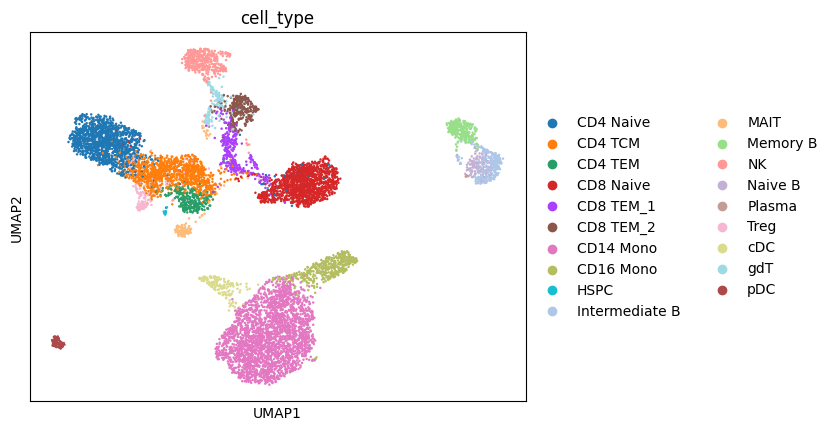

UMAP plot for pca dataset_Pbmc10k saved as _pca_dataset_Pbmc10k_plot.png

=== Processing dataset: dataset_TEA ===
Initializing PCA Model
Loaded configuration successfully.
PCA initialized with dataset_TEA, 20 components.
Loaded models for dataset_TEA: dict_keys(['pca'])

Training model: pca for dataset: dataset_TEA
Using CPU mode for PCA.
Training PCA Model
PCA completed with 20 components
Training completed.
Saving PCA latent embeddings
Latent data saved to ./outputs/pca_output/pca_dataset_TEA.h5ad
Loading latent data from ./outputs/pca_output/pca_dataset_TEA.h5ad
Latent data loaded successfully.
Generating UMAP with PCA embeddings for all modalities


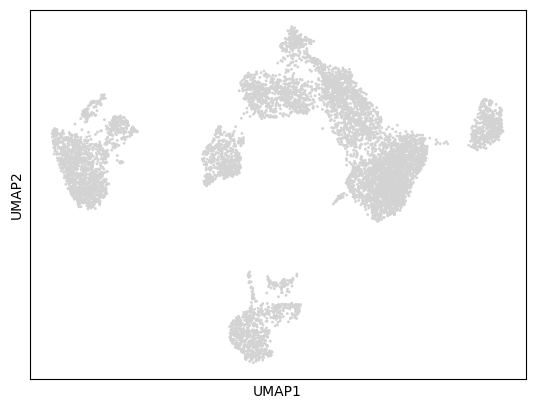

UMAP plot for pca dataset_TEA saved as _pca_dataset_TEA_plot.png


In [4]:
# Iterate over datasets
for dataset_name, dataset_data in datasets.items():
    print(f"\n=== Processing dataset: {dataset_name} ===")
    
    # Select models for this dataset
    models = my_trainer.model_select(dataset_name, dataset_data)
    print(f"Loaded models for {dataset_name}: {models.keys()}")
    
    # Train each model
    for model_name, model in models.items():
        print(f"\nTraining model: {model_name} for dataset: {dataset_name}")
        model.to()
        model.train()
        model.save_latent()
        model.load_latent()
        model.umap()


In [5]:
if hasattr(model, 'latent'):
            print(f"Latent data for model {model_name} of dataset {dataset_name}:")
            print(model.latent)  # Printing the latent embeddings
elif hasattr(model.dataset, 'obsm') and 'X_pca' in model.dataset.obsm:
            print(f"Latent data (PCA) for model {model_name} of dataset {dataset_name}:")
            print(model.dataset.obsm['X_pca'])  # For PCA, or another latent space you might use
else:
            print(f"No latent data found for model {model_name} of dataset {dataset_name}")

Latent data for model pca of dataset dataset_TEA:
[[-6.747332   -1.273491    0.08276902 ...  0.6759443   1.4473915
  -1.6746423 ]
 [17.606245   -6.885629    2.2269769  ...  1.1124129  -2.2979577
   0.8650366 ]
 [-5.096294   -3.5773036  -4.9170575  ...  0.7366047   2.20286
   1.6774948 ]
 ...
 [-6.6501517   1.2857772   8.460353   ...  1.6576482  -0.6245683
  -3.220989  ]
 [-4.3206215  -3.646897   -1.9441547  ... -0.1810768   0.44544104
  -0.49969208]
 [-4.598248   -4.72801    -5.4270334  ... -0.04213873  0.9006527
  -0.3032057 ]]
